# Hands-on Search Algorithms
## Artificial Intelligence Fundamentals 2023/24
Elia Piccoli (elia.piccoli@phd.unipi.it)

---

## Creating the virtual environment and installing required packages

Create the virtual environment and activate it.

You can use _venv_, _virtualenv_ or _conda_ whichever you prefer.

In [94]:
#python3 -m venv minihack
#source minihack/bin/activate

Install _nle_ (https://github.com/facebookresearch/nle)

In [95]:
#pip install nle

Install _minihack_ (https://github.com/facebookresearch/minihack)

In [96]:
#pip install minihack

Install other packages needed for this hands-on (_matplotlib_ for plots, _notebook_ for jupyter notebooks)

In [97]:
#pip install matplotlib notebook

Activate the jupyter server and access it by the localhost at the given port (usually 8888 or around that number)

In [98]:
#jupyter notebook

---

## Creating minihack environments and their features

In [99]:
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display

Show list of all minihack environments

In [100]:
!python -m minihack.scripts.env_list

MiniHack-Room-5x5-v0
MiniHack-Room-Random-5x5-v0
MiniHack-Room-Dark-5x5-v0
MiniHack-Room-Monster-5x5-v0
MiniHack-Room-Trap-5x5-v0
MiniHack-Room-Ultimate-5x5-v0
MiniHack-Room-15x15-v0
MiniHack-Room-Random-15x15-v0
MiniHack-Room-Dark-15x15-v0
MiniHack-Room-Monster-15x15-v0
MiniHack-Room-Trap-15x15-v0
MiniHack-Room-Ultimate-15x15-v0
MiniHack-Corridor-R2-v0
MiniHack-Corridor-R3-v0
MiniHack-Corridor-R5-v0
MiniHack-KeyRoom-Fixed-S5-v0
MiniHack-KeyRoom-S5-v0
MiniHack-KeyRoom-S15-v0
MiniHack-KeyRoom-Dark-S5-v0
MiniHack-KeyRoom-Dark-S15-v0
MiniHack-MazeWalk-9x9-v0
MiniHack-MazeWalk-Mapped-9x9-v0
MiniHack-MazeWalk-15x15-v0
MiniHack-MazeWalk-Mapped-15x15-v0
MiniHack-MazeWalk-45x19-v0
MiniHack-MazeWalk-Mapped-45x19-v0
MiniHack-CorridorBattle-v0
MiniHack-CorridorBattle-Dark-v0
MiniHack-MultiRoom-N2-v0
MiniHack-MultiRoom-N4-v0
MiniHack-MultiRoom-N6-v0
MiniHack-MultiRoom-N10-v0
MiniHack-MultiRoom-N6-OpenDoor-v0
MiniHack-MultiRoom-N10-OpenDoor-v0
MiniHack-MultiRoom-N2-Locked-v0
MiniHack-MultiRoom-N4-L

Create and render the environment

In [101]:
# create the environment
env = gym.make("MiniHack-ExploreMaze-Easy-Mapped-v0")
# reset it to initial state
state = env.reset()
# render the environment
env.render()


You are lucky!  Full moon tonight.                                              
                                                                                
                                                                                
                                                                                
---     ----      ---                                                           
|.       ..        .|                                                           
|@... ..............|                                                           
|....   ...       ..|                                                           
|.. ....... . ......|                                                           
|..   . ... . .    .|                                                           
|.. ... .>. . . ....|                                                           
|.. .   ... . .   ..|                                                           
|.... ..... ........|      

Using the env instance is possible to print the available actions

In [102]:
env.actions

(<CompassDirection.N: 107>,
 <CompassDirection.E: 108>,
 <CompassDirection.S: 106>,
 <CompassDirection.W: 104>,
 <CompassDirection.NE: 117>,
 <CompassDirection.SE: 110>,
 <CompassDirection.SW: 98>,
 <CompassDirection.NW: 121>,
 <Command.OPEN: 111>,
 <Command.KICK: 4>,
 <Command.SEARCH: 115>,
 <Command.EAT: 101>)

Analyzing the state variable we can see all the different representations

check: https://minihack.readthedocs.io/en/latest/getting-started/observation_spaces.html

In [103]:
state

{'glyphs': array([[2359, 2359, 2359, ..., 2359, 2359, 2359],
        [2359, 2359, 2359, ..., 2359, 2359, 2359],
        [2359, 2359, 2359, ..., 2359, 2359, 2359],
        ...,
        [2359, 2359, 2359, ..., 2359, 2359, 2359],
        [2359, 2359, 2359, ..., 2359, 2359, 2359],
        [2359, 2359, 2359, ..., 2359, 2359, 2359]], dtype=int16),
 'chars': array([[32, 32, 32, ..., 32, 32, 32],
        [32, 32, 32, ..., 32, 32, 32],
        [32, 32, 32, ..., 32, 32, 32],
        ...,
        [32, 32, 32, ..., 32, 32, 32],
        [32, 32, 32, ..., 32, 32, 32],
        [32, 32, 32, ..., 32, 32, 32]], dtype=uint8),
 'colors': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'specials': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0,

In our case we will consider only two representations:
- _chars_: represents the map using a multi-dimensional array containing the ASCII encoding of the characters
- _pixel_: stores the 3 channel informations to render visually the environment

In [104]:
env = gym.make("MiniHack-ExploreMaze-Easy-Mapped-v0", observation_keys=("chars", "pixel"))
state = env.reset()
env.render()


You are lucky!  Full moon tonight.                                              
                                                                                
                                                                                
                                                                                
----.-  ----      ---                                                           
|. ..    ..        .|                                                           
|.. ....... ........|                                                           
|..     ...   .   ..|                                                           
|.. ... ... ... . ..|                                                           
|.. . . .....   . ..|                                                           
|@... . ... ... ....|                                                           
|..   . ... .   .  .|                                                           
|.... ...>. ........|      

Print the shape of the two representations

In [105]:
state['chars'].shape, state['pixel'].shape

((21, 79), (336, 1264, 3))

We can render visually the environment

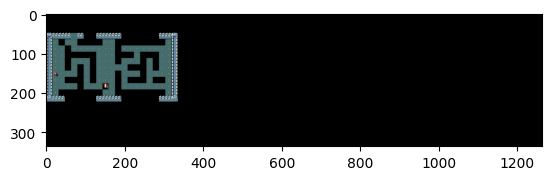

In [106]:
plt.imshow(state['pixel'])

---

In [107]:
from utils import *
from algorithms import bfs, a_star

## Breadth-First Search (BFS)

```
procedure BFS(G, start_vertex):
    create a queue Q
    create a set visited
    enqueue start_vertex into Q
    add start_vertex to visited
    
    while Q is not empty:
        current_vertex = dequeue from Q
        process current_vertex
        
        for each neighbor in G.adjacent(current_vertex):
            if neighbor is not in visited:
                enqueue neighbor into Q
                add neighbor to visited

Create the first environment

In [108]:
env = gym.make("MiniHack-ExploreMaze-Hard-Mapped-v0", observation_keys=("chars", "pixel"))
state = env.reset()
env.render()


You are lucky!  Full moon tonight.                                              
                                                                                
                                                                                
                                                                                
---         ----.-        ---                                                   
|.           ....          .|                                                   
|.. ........... ..... ......|                                                   
|.. .   .   ...     . .    .|                                                   
|...... . ..... ... . ......|                                                   
|..     . .  .. .   .   . ..|                                                   
|.. ... . ..... ... ... . ..|                                                   
|.  . . .   ..> . .   .   ..|                                                   
|.... . . ..... . ... . ...

Render the environment (we reduce the representation to remove usesless black space)

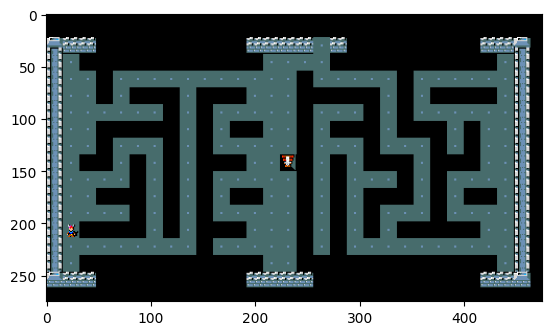

In [109]:
plt.imshow(state['pixel'][25:300, :475])

Store the state ASCII representation, which will be used to compute the solution, and the pixel information

In [110]:
game_map = state['chars']
game = state['pixel']

Find the player (@) and the target (>) using the functions in _utils.py_

In [111]:
game_map.shape

(21, 79)

In [112]:
start1 = get_player_location1(game_map)
start1
# We wanted to understand why get_player_location was defined with x[0], y[0]

(array([14]), array([1]))

In [113]:
get_player_location1.__annotations__

{'game_map': numpy.ndarray, 'symbol': str, 'return': 'ciao'}

In [114]:
start = get_player_location(game_map)
target = get_target_location(game_map)
print("Agent position:", start)
print("Target position:", target)

Agent position: (14, 1)
Target position: (10, 14)


Compute the solution finding the path to reach the target

In [115]:
%%time
path = bfs(game_map, start, target)

Target found!
CPU times: user 1.34 ms, sys: 0 ns, total: 1.34 ms
Wall time: 1.35 ms


The expected output is a list of tuples that contains the (x, y) coordinates that the player has to visit in order to reach the target.

In [116]:
path

[(14, 1),
 (13, 1),
 (12, 1),
 (11, 1),
 (10, 1),
 (9, 1),
 (9, 2),
 (8, 2),
 (7, 2),
 (7, 3),
 (7, 4),
 (6, 4),
 (5, 4),
 (5, 5),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (5, 10),
 (5, 11),
 (5, 12),
 (6, 12),
 (7, 12),
 (7, 13),
 (8, 13),
 (9, 13),
 (10, 13),
 (10, 14)]

From the sequence of (x, y) coordinates compute the actual actions.

In [117]:
actions = actions_from_path(start, path[1:])

In [118]:
actions

[0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1]

Iterate over actions and render the environment to see the solution.

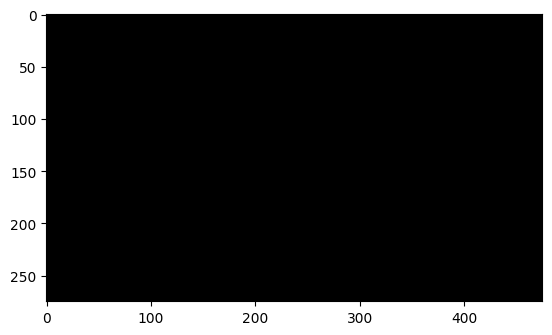

In [119]:
image = plt.imshow(game[25:300, :475])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][25:300, :475])

---

## Using custom des files
- https://minihack-editor.github.io/
- https://minihack.readthedocs.io/en/latest/tutorials/des_file_tutorial.html

In [120]:
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel"),
    des_file = "simple_maze.des",
)
state = env.reset()
env.render()


You are lucky!  Full moon tonight.                                              
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                              -------------------                               
                              |.................|                               
                              |..-----....|..|..|                               
                              |..|   |..-------.|                               
                              |..--- |.......|..|                               
                              |....| -------.|-.|                               
                           

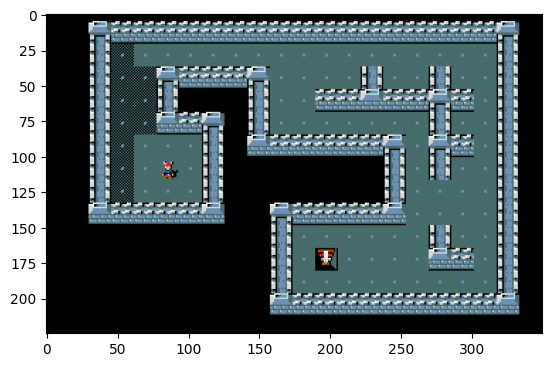

In [121]:
plt.imshow(state['pixel'][75:300, 450:800])

In [122]:
game_map = state['chars']
game = state['pixel']
start = get_player_location(game_map)
target = get_target_location(game_map)
print(start)

(11, 33)


In [123]:
%%time
path = bfs(game_map, start, target)

Target found!
CPU times: user 1.2 ms, sys: 60 µs, total: 1.26 ms
Wall time: 1.27 ms


In [124]:
actions = actions_from_path(start, path[1:])

In [125]:
path[1:]

[(11, 32),
 (10, 32),
 (9, 32),
 (8, 32),
 (7, 32),
 (6, 32),
 (6, 33),
 (6, 34),
 (6, 35),
 (6, 36),
 (6, 37),
 (6, 38),
 (7, 38),
 (8, 38),
 (9, 38),
 (9, 39),
 (9, 40),
 (9, 41),
 (9, 42),
 (9, 43),
 (9, 44),
 (10, 44),
 (11, 44),
 (12, 44),
 (13, 44),
 (14, 44),
 (14, 43),
 (14, 42),
 (14, 41),
 (14, 40),
 (15, 40)]

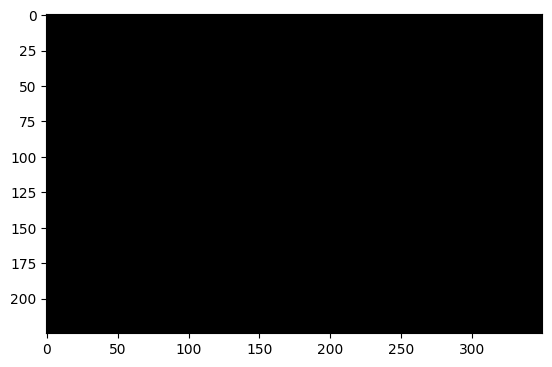

In [126]:
image = plt.imshow(game[75:300, 450:800])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][75:300, 450:800])

---

In [127]:
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel"),
    des_file = "complex_maze.des",
)
state = env.reset()
env.render()


You are lucky!  Full moon tonight.                                              
                                                                                
                                   -----------------                            
                     ----------    |...............|                            
                     |........|    |............|..|                            
                     |........|    |............|..|                            
                     ------...|    |..-----..----..|                            
                          |...|    |..|   |........|                            
                          |...|    |..|   |........|  ------                    
                    -------...------..|   |.....----  |....|                    
                    |.................|   |.....|     |....|                    
                    |..-----....|..|..|   |.....-------....|                    
                    |..|   

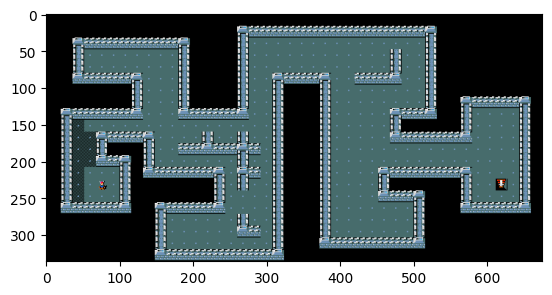

In [128]:
plt.imshow(state['pixel'][:, 300:975])

In [129]:
game_map = state['chars']
game = state['pixel']
start = get_player_location(game_map)
target = get_target_location(game_map)

In [130]:
%%time
path = bfs(game_map, start, target)

Target found!
CPU times: user 4.96 ms, sys: 236 µs, total: 5.2 ms
Wall time: 6.07 ms


In [131]:
actions = actions_from_path(start, path[1:])

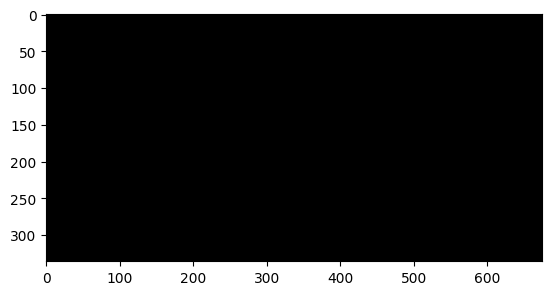

In [132]:
image = plt.imshow(game[:, 300:975])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][:, 300:975])

---

## A* Search Algorithm

A* (star) Pathfinding
```
// Initialize both open and closed list  
let the openList equal empty list of nodes  
let the closedList equal empty list of nodes
// Add the start node  
put the startNode on the openList
// Loop until you find the end  
while the openList is not empty
	// Get the current node  
    let the currentNode equal the node with the least f value  
    remove the currentNode from the openList  
    add the currentNode to the closedList
    // Check if found the goal  
    if currentNode is the goal  
        Congratz! You've found the end! Backtrack to get path
	
	// Generate children  
    let the children of the currentNode equal the adjacent nodes  
      
    for each child in the children 
	    // Check if child is on the closedList  
        if child is in the closedList  
            continue to beginning of for loop
        
        // Create the f, g, and h values  
        child.g = currentNode.g + distance between child and current  
        child.h = distance from child to end  
        child.f = child.g + child.h
        
        // Child is already in openList  
        if child.position is in the openList's nodes positions  
            if the child.g is higher than the openList node's g  
                continue to beginning of for loop
        
        // Add the child to the openList  
        add the child to the openList

In [133]:
env = gym.make("MiniHack-ExploreMaze-Hard-Mapped-v0", observation_keys=("chars", "pixel"))
state = env.reset()
env.render()


You are lucky!  Full moon tonight.                                              
                                                                                
                                                                                
                                                                                
---         ----          ---                                                   
|.           ..            .|                                                   
|.... ......... ............|                                                   
|.. .       ... .         ..|                                                   
|.. ........... ... . ... ..|                                                   
|..         ...   . . . . ..|                                                   
|.... ... . ... . ... . ....|                                                   
|@    . . . ..>..   . .   ..|                                                   
|...... ... ... ... . ... .

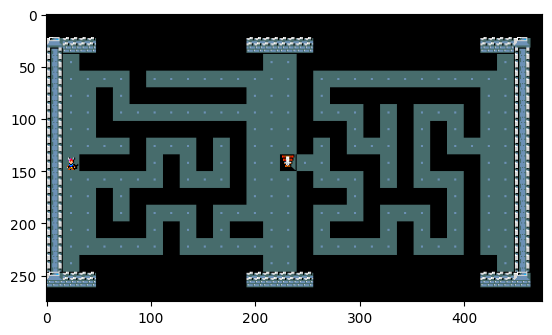

In [134]:
plt.imshow(state['pixel'][25:300, :475])

In [135]:
game_map = state['chars']
game = state['pixel']

In [136]:
start = get_player_location(game_map)
target = get_target_location(game_map)
print("Agent position:", start)
print("Target position:", target)

Agent position: (10, 1)
Target position: (10, 14)


In [137]:
%%time
path = a_star(game_map, start, target, manhattan_distance)

Target found!
CPU times: user 2.69 ms, sys: 0 ns, total: 2.69 ms
Wall time: 2.62 ms


In [138]:
from queue import PriorityQueue
q = PriorityQueue()
q.put(3)
q.qsize()

1

In [85]:
q.get()

3

In [86]:
q.qsize()

0

In [139]:
actions = actions_from_path(start, path[1:])

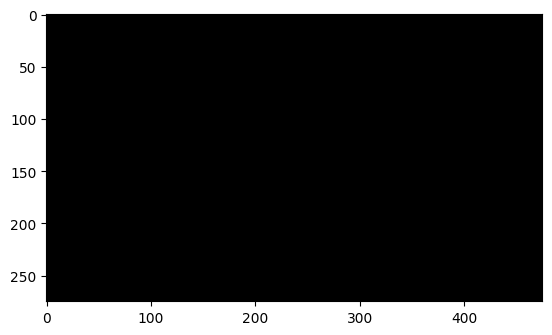

In [140]:
image = plt.imshow(game[25:300, :475])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][25:300, :475])

---

In [141]:
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel"),
    des_file = "simple_maze.des",
)
state = env.reset()
env.render()


You are lucky!  Full moon tonight.                                              
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                              -------------------                               
                              |.................|                               
                              |..-----....|..|..|                               
                              |..|   |..-------.|                               
                              |..--- |.......|..|                               
                              |....| -------.|-.|                               
                           

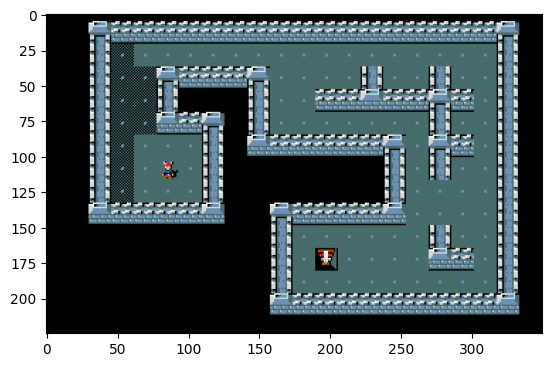

In [142]:
plt.imshow(state['pixel'][75:300, 450:800])

In [143]:
game_map = state['chars']
game = state['pixel']
start = get_player_location(game_map)
target = get_target_location(game_map)

In [144]:
%%time
path = a_star(game_map, start, target, manhattan_distance)

Target found!
CPU times: user 1.85 ms, sys: 0 ns, total: 1.85 ms
Wall time: 1.96 ms


In [145]:
actions = actions_from_path(start, path[1:])

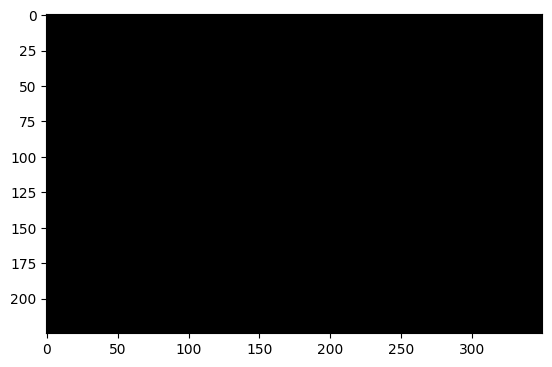

In [146]:
image = plt.imshow(game[75:300, 450:800])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][75:300, 450:800])

---

In [147]:
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel"),
    des_file = "complex_maze.des",
)
state = env.reset()
env.render()


You are lucky!  Full moon tonight.                                              
                                                                                
                                   -----------------                            
                     ----------    |...............|                            
                     |........|    |............|..|                            
                     |........|    |............|..|                            
                     ------...|    |..-----..----..|                            
                          |...|    |..|   |........|                            
                          |...|    |..|   |........|  ------                    
                    -------...------..|   |.....----  |....|                    
                    |.................|   |.....|     |....|                    
                    |..-----....|..|..|   |.....-------....|                    
                    |..|   

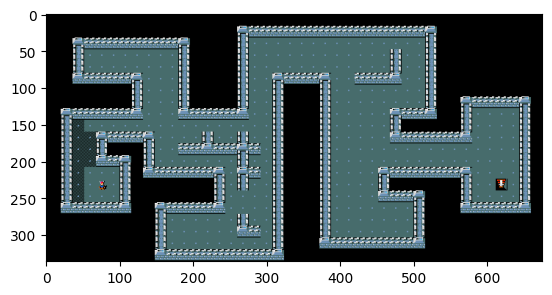

In [148]:
plt.imshow(state['pixel'][:, 300:975])

In [149]:
game_map = state['chars']
game = state['pixel']
start = get_player_location(game_map)
target = get_target_location(game_map)

In [150]:
%%time
path = a_star(game_map, start, target, manhattan_distance)

Target found!
CPU times: user 11.7 ms, sys: 4.17 ms, total: 15.9 ms
Wall time: 15.5 ms


In [151]:
actions = actions_from_path(start, path[1:])

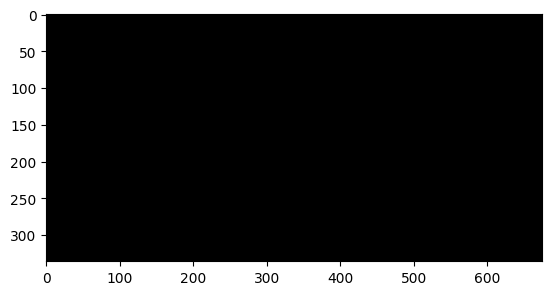

In [152]:
image = plt.imshow(game[:, 300:975])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][:, 300:975])

---

Using the '_crop_' combined with some observation keys, it returns a view centered around the agent.
Usually is 9x9, but can be modified at preference.

In [153]:
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel_crop"),
    des_file = "complex_maze.des",
)
state = env.reset()
env.render()


You are lucky!  Full moon tonight.                                              
                                                                                
                                   -----------------                            
                     ----------    |...............|                            
                     |........|    |............|..|                            
                     |........|    |............|..|                            
                     ------...|    |..-----..----..|                            
                          |...|    |..|   |........|                            
                          |...|    |..|   |........|  ------                    
                    -------...------..|   |.....----  |....|                    
                    |.................|   |.....|     |....|                    
                    |..-----....|..|..|   |.....-------....|                    
                    |..|   

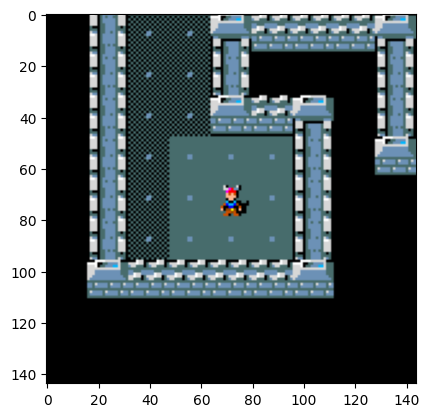

In [154]:
plt.imshow(state['pixel_crop'])

In [155]:
game_map = state['chars']
game = state['pixel_crop']
start = get_player_location(game_map)
target = get_target_location(game_map)

In [156]:
%%time
path = a_star(game_map, start, target, manhattan_distance)

Target found!
CPU times: user 16.6 ms, sys: 130 µs, total: 16.7 ms
Wall time: 19.5 ms


In [157]:
actions = actions_from_path(start, path[1:])

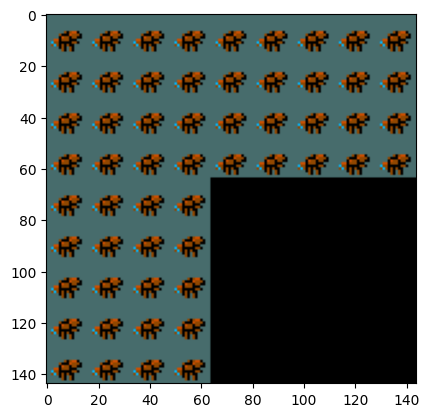

In [158]:
image = plt.imshow(game)
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel_crop'])